# Exploratory Data Analysis (EDA) Notebook

## Importing Libraries and Data  
- Loading the dataset and necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('Customers.csv')
customers.head(2)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13


In [3]:
products = pd.read_csv('Products.csv')
products.head(2)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.3
1,P002,ActiveWear Smartwatch,Electronics,346.3


In [4]:
transactions = pd.read_csv('Transactions.csv')
transactions.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68


## Creating a Copy of the Dataset  
- Ensuring the original data remains unchanged during analysis.

In [5]:
customers_copy = customers.copy()
products_copy = products.copy()
transactions_copy = transactions.copy()

## Data Cleaning Process  
- Handling missing values.  
- Identifying and removing duplicate records.  
- Checking and correcting data types.

In [7]:
print(customers_copy.isnull().sum())
print(products_copy.isnull().sum())
print(transactions_copy.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
print(customers_copy.duplicated().sum())
print(products_copy.duplicated().sum())
print(transactions_copy.duplicated().sum())

0
0
0


In [9]:
print(customers_copy.dtypes)
print(products_copy.dtypes)
print(transactions_copy.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


## Converting Data Types  
- Changing date-related columns to **datetime format** for better analysis.

In [10]:
customers_copy["SignupDate"] = pd.to_datetime(customers_copy["SignupDate"])
transactions_copy["TransactionDate"] = pd.to_datetime(transactions_copy["TransactionDate"])

## Standardizing Categorical Data  
- Ensuring consistency in categorical values (e.g., case sensitivity, spelling errors).

In [11]:
customers_copy["Region"] = customers_copy["Region"].str.title().str.strip()
products_copy["Category"] = products_copy["Category"].str.title().str.strip()

## Validating Foreign Key Relationships  
- Verifying that **referential integrity** is maintained between tables.

In [12]:
missing_customers = transactions_copy[~transactions_copy["CustomerID"].isin(customers_copy["CustomerID"])]
print(missing_customers)

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


In [13]:
missing_products = transactions_copy[~transactions_copy["ProductID"].isin(products_copy["ProductID"])]
print(missing_products)

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


## Creating new column for totalsales

In [14]:
transactions_copy["TotalValue"] = transactions_copy["Quantity"] * transactions_copy["Price"]

## Final Verification  
- Ensuring the dataset is clean and structured for further analysis.

In [18]:
print(customers_copy.info())
print(products_copy.info())
print(transactions_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

## Exploratory Data Analysis (EDA)  

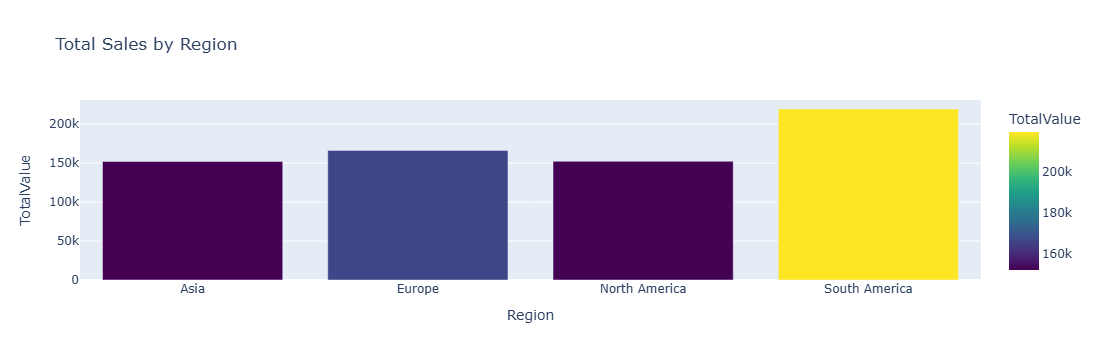

In [28]:
# Insight 1: Sales Distribution by Region
region_wise_sales = transactions_copy.merge(customers_copy, on="CustomerID").groupby("Region", as_index=False)["TotalValue"].sum()
fig = px.bar(region_wise_sales, x="Region", y="TotalValue", title="Total Sales by Region",color="TotalValue",color_continuous_scale="viridis")
fig.show()

### **1️⃣ Regional Sales Performance**
📌 **Observation:**  
- **South America** has the highest total sales, followed by **Europe, North America, and Asia**.  
- **South America** appears to be the most profitable region, suggesting a strong customer base.  
- Expansion and marketing efforts should be intensified in other regions to **balance revenue distribution**.


Mean Monthly Sales: 57499.63
Median Monthly Sales: 60168.89
Sales Standard Deviation: 10627.54
Sales Variance: 112944632.74


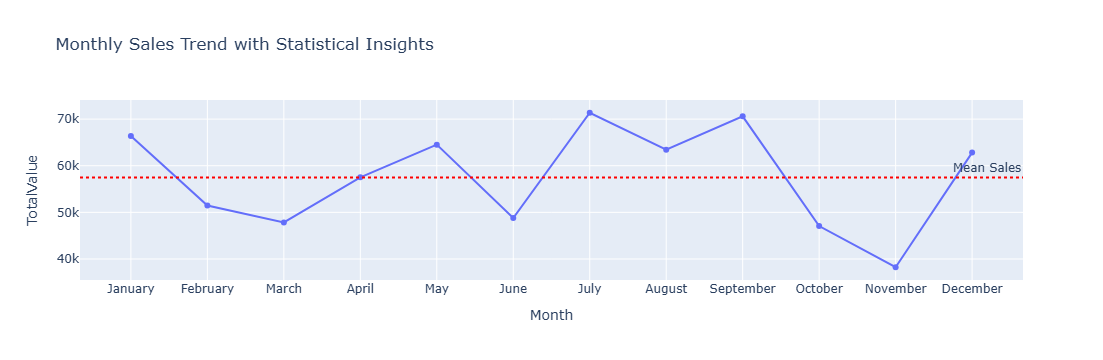

In [39]:
# Insight 2:Monthly Sales Analysis with Statistical Insights
transactions_copy['Month'] =  transactions_copy['TransactionDate'].dt.strftime('%B')
monthly_sales = transactions_copy.groupby('Month',as_index=False)['TotalValue'].sum()
order =["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'],categories=order,ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

mean_sales = monthly_sales["TotalValue"].mean()
median_sales = monthly_sales["TotalValue"].median()
std_sales = monthly_sales["TotalValue"].std()
var_sales = monthly_sales["TotalValue"].var()
print(f"Mean Monthly Sales: {mean_sales:.2f}")
print(f"Median Monthly Sales: {median_sales:.2f}")
print(f"Sales Standard Deviation: {std_sales:.2f}")
print(f"Sales Variance: {var_sales:.2f}")

fig = px.line(monthly_sales, x="Month", y="TotalValue", title="Monthly Sales Trend with Statistical Insights",markers=True)
fig.add_hline(y=mean_sales, line_dash="dot", line_color="red", annotation_text="Mean Sales")
fig.show()

### **2️⃣ Sales Trend Analysis**
📌 **Observation:**  
- **Sales fluctuate throughout the year**, with peaks in **January, July, and December**.  
- The **average monthly sales** are **57,499.63**, with significant variance.  
- Seasonal spikes indicate **holiday and promotional effects**.  
- Business strategies should focus on:
  - **Leveraging peak seasons** with special offers.
  - **Addressing sales drops** during slower months.


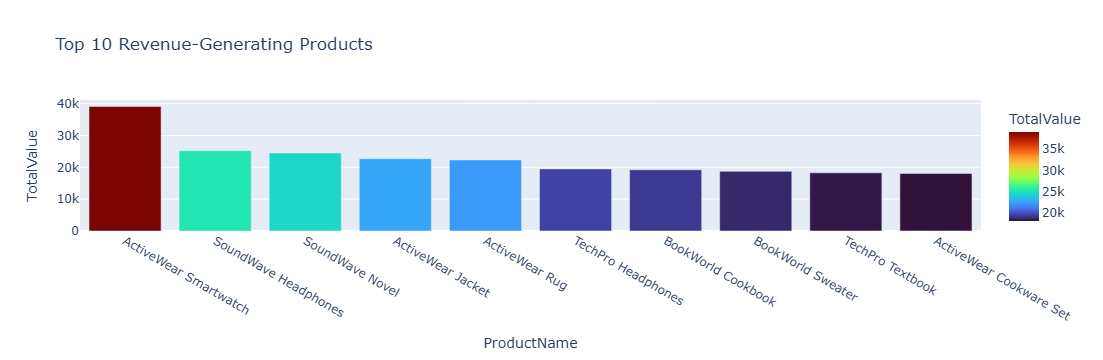

In [33]:
# Insight 3:Top Revenue-Generating Products
top_products = transactions_copy.merge(products_copy,on='ProductID').groupby('ProductName',as_index=False)['TotalValue'].sum().sort_values(by='TotalValue',ascending=False).head(10)
fig = px.bar(top_products, x="ProductName", y="TotalValue", title="Top 10 Revenue-Generating Products",
             color="TotalValue",
             color_continuous_scale="turbo")
fig.show()

### **3️⃣ Best-Selling Products**
📌 **Observation:**  
- **"ActiveWear Smartwatch"** generates the highest revenue, followed by **SoundWave and TechPro** products.  
- These **top-performing products** should be prioritized in:
  - **Stock management**  
  - **Promotions and marketing**  
  - **Bundling strategies** to maximize profits.


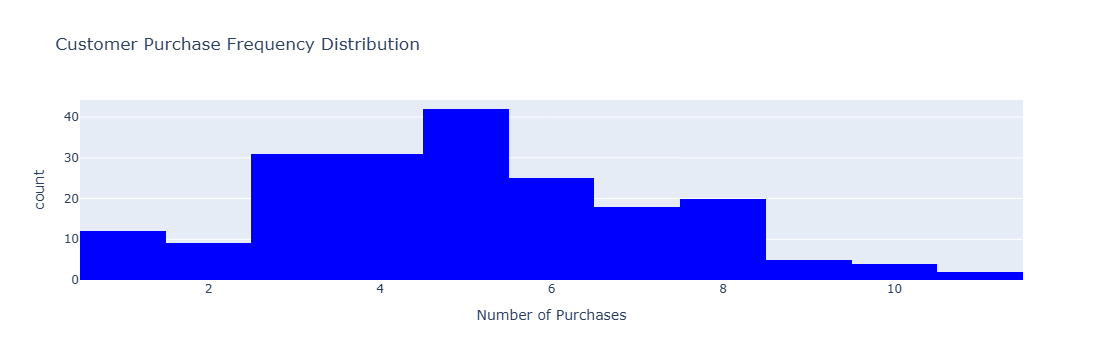

In [44]:
#Insight 4:Customer Purchase Frequency
customer_freq = transactions_copy['CustomerID'].value_counts().reset_index()
customer_freq.columns = ["CustomerID", "PurchaseCount"]
fig1 = px.histogram(customer_freq, x="PurchaseCount", 
title="Customer Purchase Frequency Distribution",labels={"PurchaseCount": "Number of Purchases", "count": "Number of Customers"},
                    nbins=20,color_discrete_sequence=["blue"])
fig1.show()

### **4️⃣ Customer Purchase Behavior**
📌 **Observation:**  
- The majority of customers make **fewer purchases**, with only a small percentage making **frequent transactions**.  
- This highlights the **need for customer retention strategies**, such as:
  - **Loyalty programs**
  - **Discounts for repeat customers**
  - **Personalized recommendations** to encourage repeat purchases.


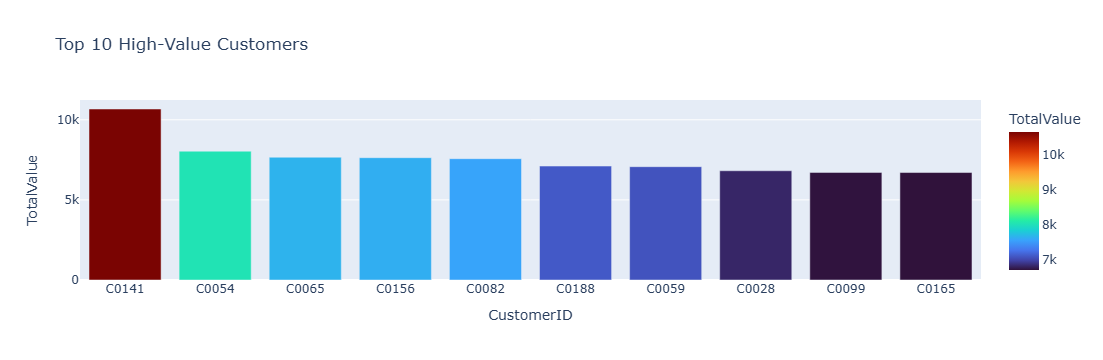

In [47]:
# Insight 5 :High-Value Customers
customer_spending = transactions_copy.groupby('CustomerID',as_index=False)['TotalValue'].sum()
top_customers = customer_spending.sort_values(by="TotalValue", ascending=False).head(10)
fig2 = px.bar(top_customers, x="CustomerID", y="TotalValue", title="Top 10 High-Value Customers",
              color="TotalValue",
              color_continuous_scale="turbo")

fig2.show()

### **5️⃣ High-Value Customers**
📌 **Observation:**  
- Certain customers have **significantly higher spending** compared to others.  
- These **high-value customers** should be targeted with:
  - **Premium services**
  - **Exclusive discounts**
  - **Personalized deals** to **increase long-term retention and lifetime value**.
